In [10]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Load the Dataset
data = pd.read_csv("../data/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
#Last 5 rows
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [13]:
#Overview description of the data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
#Structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
#Shape of the data
data.shape

(1338, 7)

In [16]:
#Check for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
#Check for duplicate values
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

EXPLORATORY DATA ANALYSIS (EDA)

UNIVARIATE ANALYSIS

In [18]:
#Check min and max values for age and bmi
print("Age Range:", data['age'].min(), "to", data['age'].max())
print("BMI Range:", data['bmi'].min(), "to", data['bmi'].max())

Age Range: 18 to 64
BMI Range: 15.96 to 53.13


In [19]:
#Create age brackets
#Define bins
age_bins = [0, 18, 25, 30, 35, 40, 45, 50, 55, 60, 65]

#Define bin labels
age_labels = ['0–18','19–25','26–30','31–35','36–40','41–45','46–50','51–55','56–60','61–65']

#Create a new column 'age_bracket'
data['age_bracket'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, include_lowest=True, right=True)

#Value count for each age bracket
data['age_bracket'].value_counts()

age_bracket
19–25    237
46–50    144
51–55    140
26–30    138
41–45    137
31–35    130
36–40    127
56–60    125
61–65     91
0–18      69
Name: count, dtype: int64

In [20]:
#Create bmi brackets
#Define bins
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]

#Define bin labels
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']

#Create a new column 'age_bracket'
data['bmi_bracket'] = pd.cut(data['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

#Value count for each bmi bracket
data['bmi_bracket'].value_counts()

bmi_bracket
Obese I        399
Overweight     377
Obese II       226
Normal         222
Obese III       94
Underweight     20
Name: count, dtype: int64

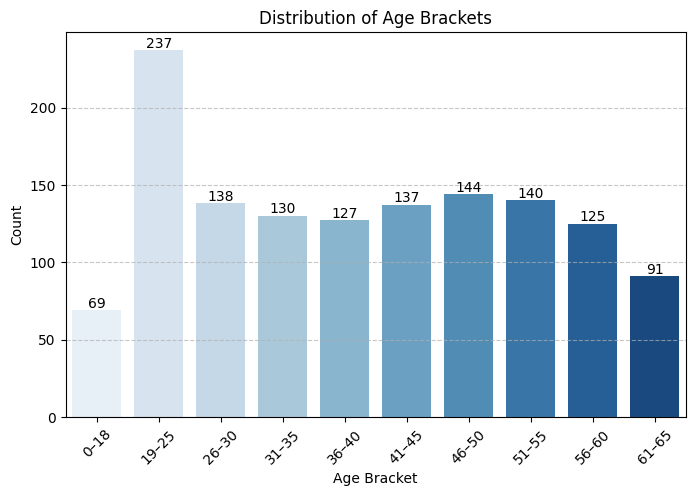

In [21]:
#Display age distribution
plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=data,
    x='age_bracket',
    hue='age_bracket',  # to avoid palette warning
    palette='Blues',
    order=data['age_bracket'].cat.categories,
    legend=False
)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.0f}',  # format as integer
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='center',
        xytext=(0, 5),  # move label 5 points above bar
        textcoords='offset points'
    )

# Customize chart
plt.title('Distribution of Age Brackets')
plt.xlabel('Age Bracket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

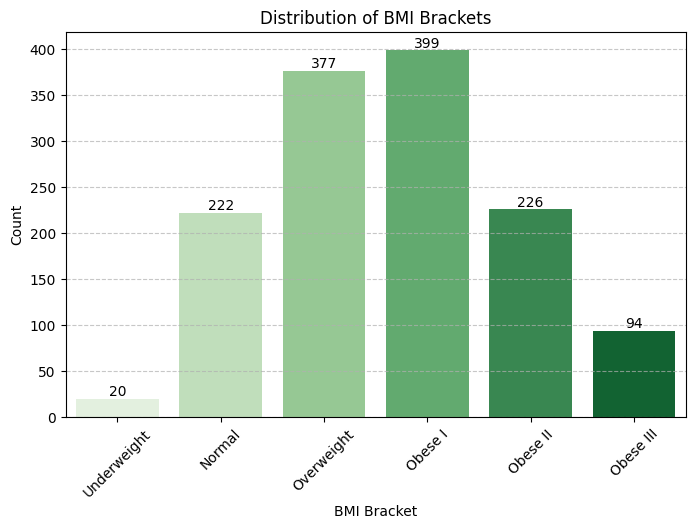

In [22]:
#Display bmi distribution
plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=data,
    x='bmi_bracket',
    hue='bmi_bracket',  # to avoid palette warning
    palette='Greens',
    order=data['bmi_bracket'].cat.categories,
    legend=False
)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.0f}',  # format as integer
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='center',
        xytext=(0, 5),  # move label 5 points above bar
        textcoords='offset points'
    )

# Customize chart
plt.title('Distribution of BMI Brackets')
plt.xlabel('BMI Bracket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [23]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_bracket', 'bmi_bracket'],
      dtype='object')

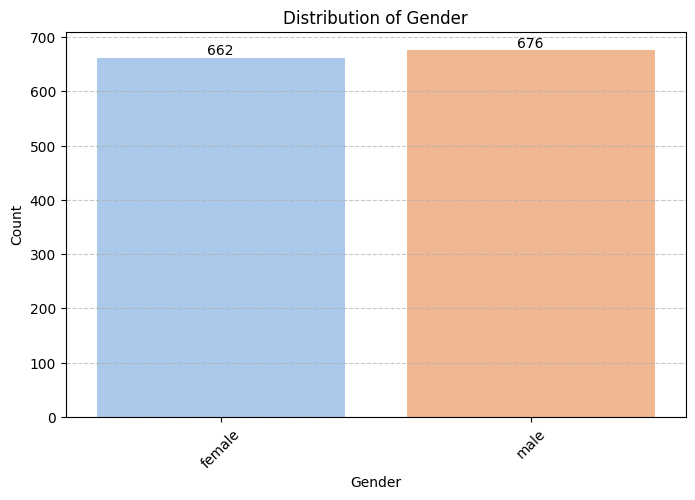

In [24]:
#Display gender distribution
plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=data,
    x='sex',
    hue='sex',  # to avoid palette warning
    palette='pastel',
    legend=False
)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.0f}',  # format as integer
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='center',
        xytext=(0, 5),  # move label 5 points above bar
        textcoords='offset points'
    )

# Customize chart
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


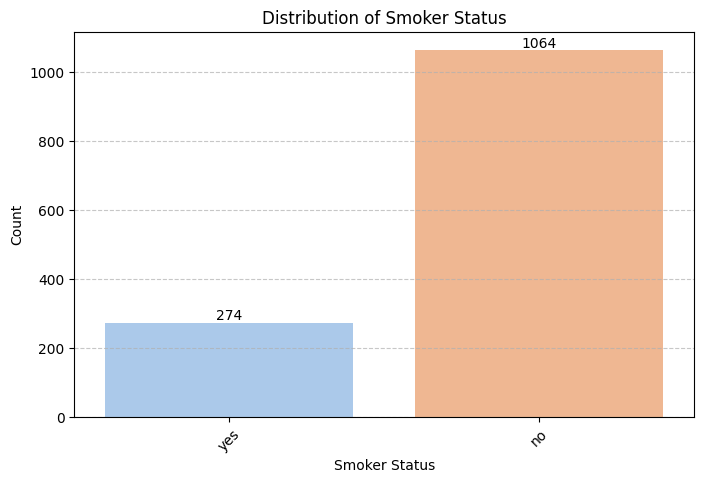

In [25]:
#Distribution of smoker status
#Display gender distribution
plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=data,
    x='smoker',
    hue='smoker',  # to avoid palette warning
    palette='pastel',
    legend=False
)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.0f}',  # format as integer
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='center',
        xytext=(0, 5),  # move label 5 points above bar
        textcoords='offset points'
    )

# Customize chart
plt.title('Distribution of Smoker Status')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

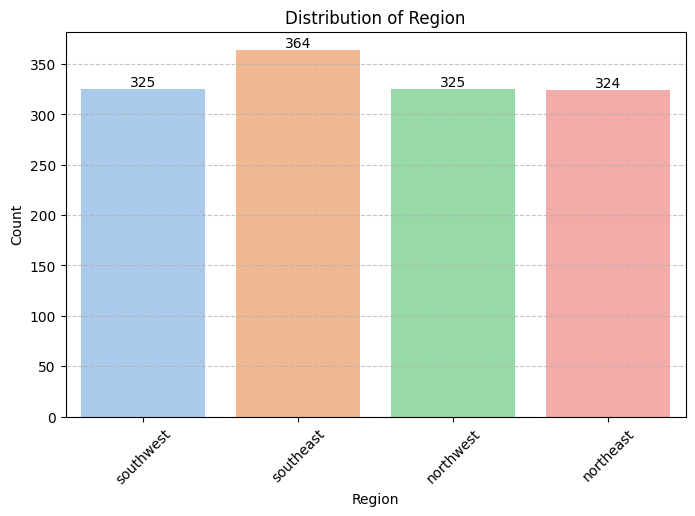

In [26]:
#Display region distribution
plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=data,
    x='region',
    hue='region',  # to avoid palette warning
    palette='pastel',
    order = data['region'],
    legend=False
)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.0f}',  # format as integer
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='center',
        xytext=(0, 5),  # move label 5 points above bar
        textcoords='offset points'
    )

# Customize chart
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

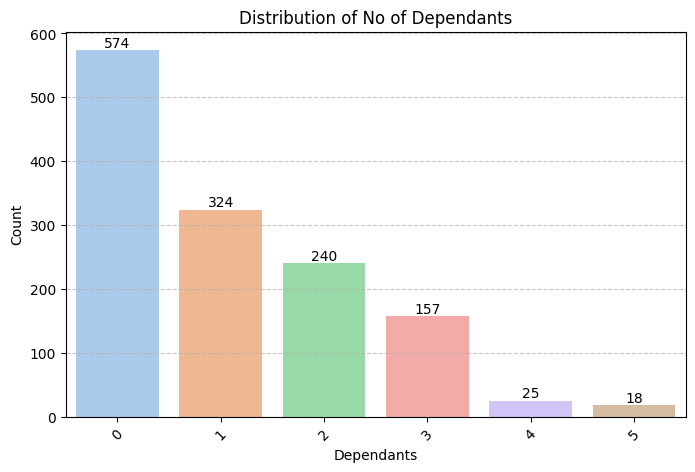

In [27]:
#Display No of Dependants Distribution
plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=data,
    x='children',
    hue='children',  # to avoid palette warning
    palette='pastel',
    legend=False
)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.0f}',  # format as integer
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='center',
        xytext=(0, 5),  # move label 5 points above bar
        textcoords='offset points'
    )

# Customize chart
plt.title('Distribution of No of Dependants')
plt.xlabel('Dependants')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

BIVARIATE ANALYSIS

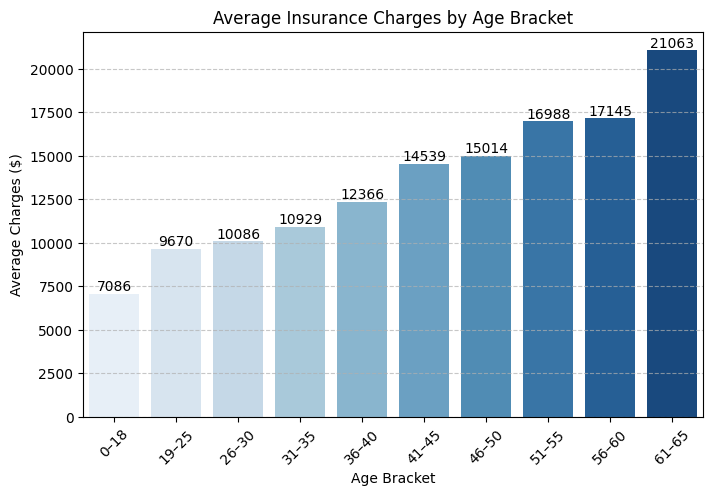

In [28]:
#Average Charges by Age Bracket
#Compute average charges per age bracket
avg_charges = data.groupby('age_bracket', observed=True)['charges'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=avg_charges, 
    x='age_bracket', 
    hue='age_bracket',
    y='charges', 
    palette='Blues',
    order=data['age_bracket'].cat.categories  # keep the correct order
)

# Add value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}', 
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center', va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

plt.title('Average Insurance Charges by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

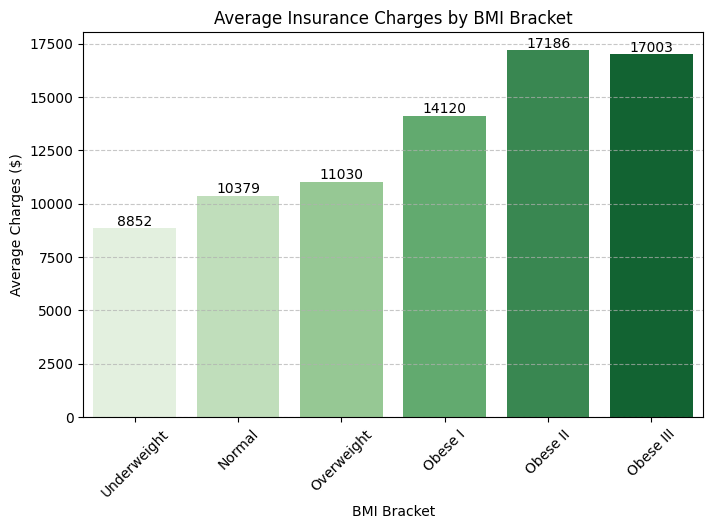

In [29]:
#Average Charges by BMI Bracket
#Compute average charges per bmi bracket
bmi_avg_charges = data.groupby('bmi_bracket', observed=True)['charges'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=bmi_avg_charges, 
    x='bmi_bracket', 
    hue='bmi_bracket',
    y='charges', 
    palette='Greens',
    order=data['bmi_bracket'].cat.categories  # keep the correct order
)

# Add value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}', 
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center', va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

plt.title('Average Insurance Charges by BMI Bracket')
plt.xlabel('BMI Bracket')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

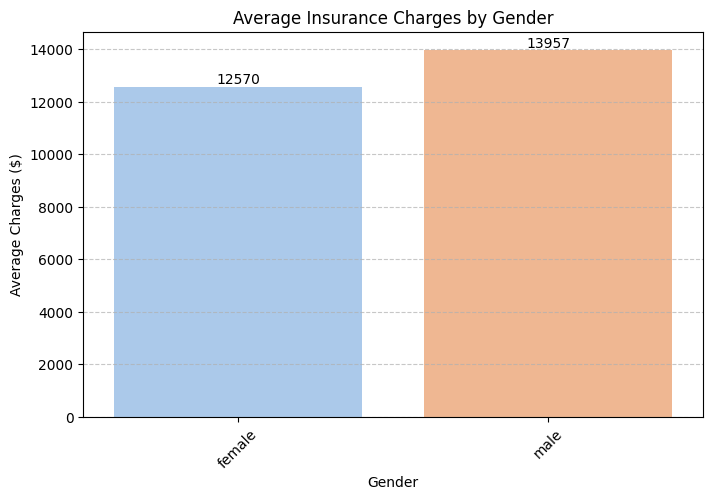

In [30]:
#Average Charges by Gender
#Compute average charges per Gender
gender_avg_charges = data.groupby('sex', observed=True)['charges'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=gender_avg_charges, 
    x='sex', 
    hue='sex',
    y='charges', 
    palette='pastel',
)

# Add value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}', 
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center', va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

plt.title('Average Insurance Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

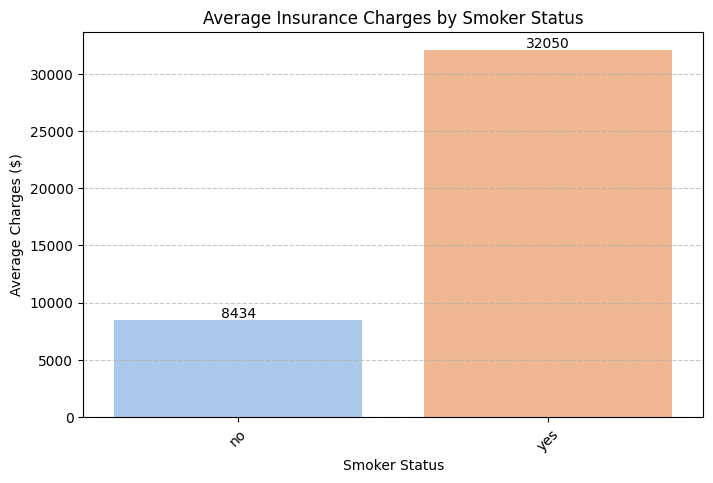

In [31]:
#Average Charges by Smoker Status
#Compute average charges per smoker status
smoker_avg_charges = data.groupby('smoker', observed=True)['charges'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=smoker_avg_charges, 
    x='smoker', 
    hue='smoker',
    y='charges', 
    palette='pastel',
)

# Add value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}', 
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center', va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

plt.title('Average Insurance Charges by Smoker Status')
plt.xlabel('Smoker Status')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

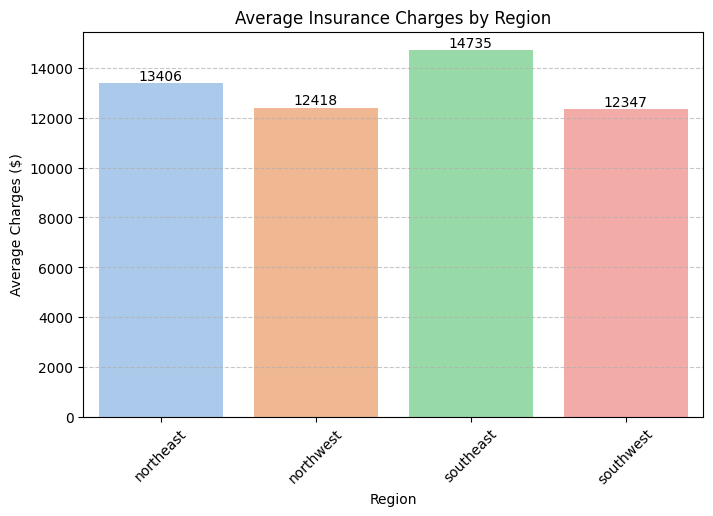

In [32]:
#Display average charges by region
#Compute average charges per region
region_avg_charges = data.groupby('region', observed=True)['charges'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=region_avg_charges, 
    x='region', 
    hue='region',
    y='charges', 
    palette='pastel',
)

# Add value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}', 
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center', va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

plt.title('Average Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

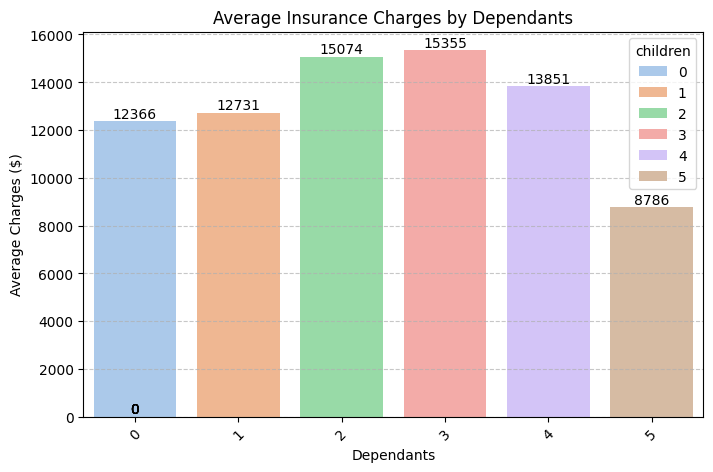

In [33]:
#Display average charges by no of dependants
#Compute average charges per no of dependants
dependant_avg_charges = data.groupby('children', observed=True)['charges'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=dependant_avg_charges, 
    x='children', 
    hue='children',
    y='charges', 
    palette='pastel',
)

# Add value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}', 
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center', va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

plt.title('Average Insurance Charges by Dependants')
plt.xlabel('Dependants')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

MULTIVARIATE ANALYSIS

Age Bracket

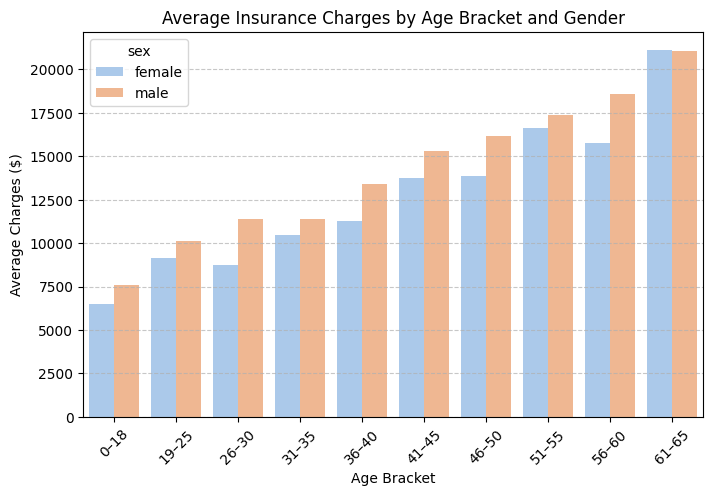

In [38]:
#Average Charges by Age Bracket & Gender
#Compute average charges per age bracket and gender
ag_avg_charges = data.groupby(['age_bracket','sex'], observed=True)['charges'].mean().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=ag_avg_charges, 
    x='age_bracket', 
    hue='sex',
    y='charges', 
    palette='pastel',
    order=data['age_bracket'].cat.categories
)

plt.title('Average Insurance Charges by Age Bracket and Gender')
plt.xlabel('Age Bracket')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

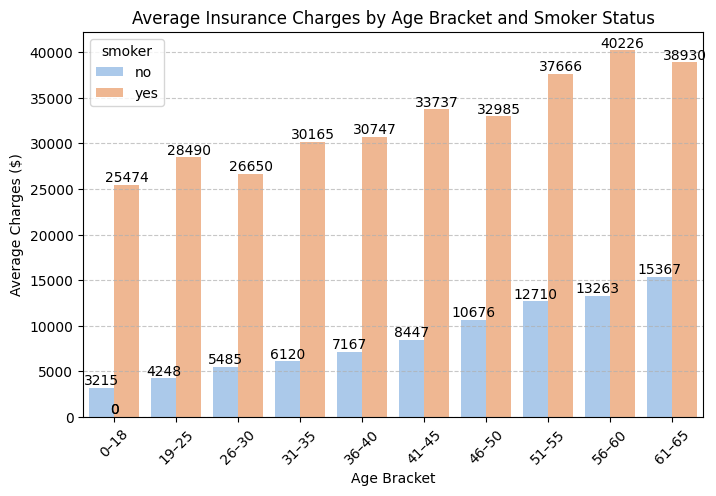

In [35]:
#Average Charges by Age Bracket & Smoker Status
#Compute average charges per age bracket and smoker status
as_avg_charges = data.groupby(['age_bracket','smoker'], observed=True)['charges'].mean().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=as_avg_charges, 
    x='age_bracket', 
    hue='smoker',
    y='charges', 
    palette='pastel',
    order=data['age_bracket'].cat.categories
)

# Add value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}', 
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center', va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

plt.title('Average Insurance Charges by Age Bracket and Smoker Status')
plt.xlabel('Age Bracket')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

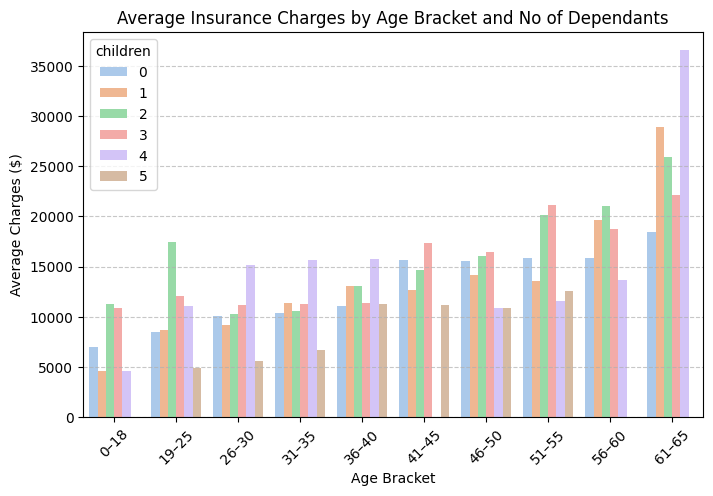

In [37]:
#Average Charges by Age Bracket & No of Dependants
#Compute average charges per age bracket and no of dependants
ac_avg_charges = data.groupby(['age_bracket','children'], observed=True)['charges'].mean().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=ac_avg_charges, 
    x='age_bracket', 
    hue='children',
    y='charges', 
    palette='pastel',
    order=data['age_bracket'].cat.categories
)

plt.title('Average Insurance Charges by Age Bracket and No of Dependants')
plt.xlabel('Age Bracket')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

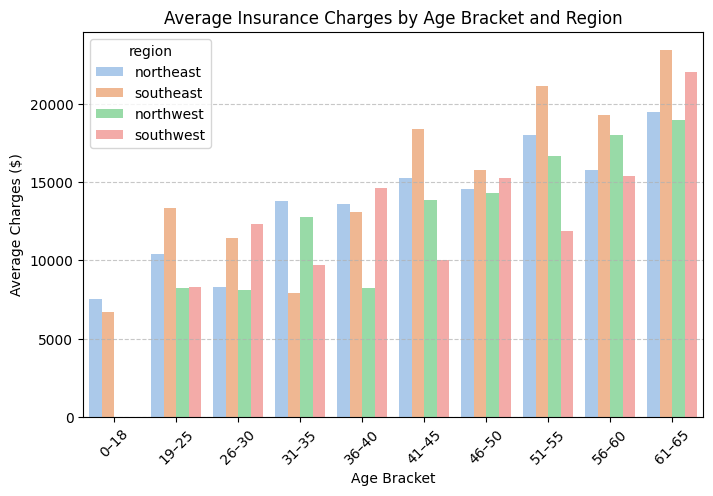

In [40]:
#Average Charges by Age Bracket & Region
#Compute average charges per age bracket and region
ar_avg_charges = data.groupby(['age_bracket','region'], observed=True)['charges'].mean().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=ar_avg_charges, 
    x='age_bracket', 
    hue='region',
    y='charges', 
    palette='pastel',
    order=data['age_bracket'].cat.categories
)

plt.title('Average Insurance Charges by Age Bracket and Region')
plt.xlabel('Age Bracket')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

BMI Bracket

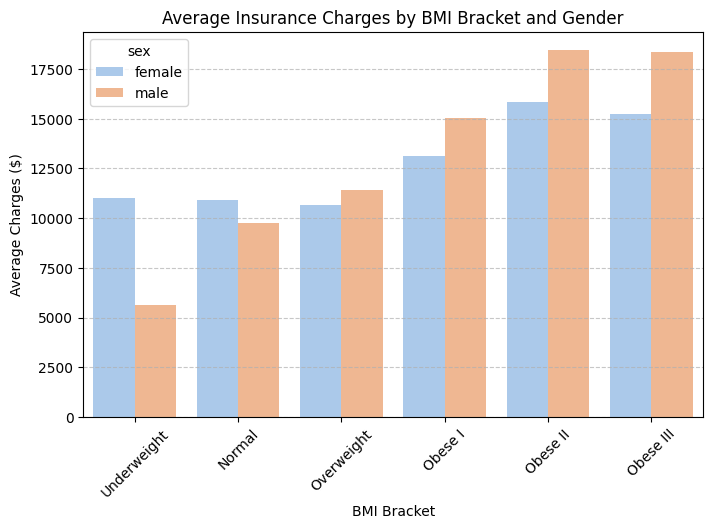

In [41]:
#Average Charges by BMI Bracket & Gender
#Compute average charges per bmi bracket and gender
bg_avg_charges = data.groupby(['bmi_bracket','sex'], observed=True)['charges'].mean().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=bg_avg_charges, 
    x='bmi_bracket', 
    hue='sex',
    y='charges', 
    palette='pastel',
    order=data['bmi_bracket'].cat.categories
)

plt.title('Average Insurance Charges by BMI Bracket and Gender')
plt.xlabel('BMI Bracket')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

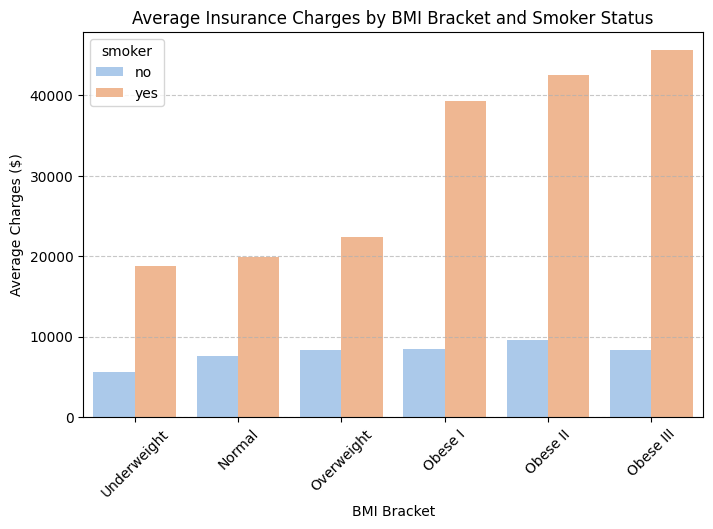

In [42]:
#Average Charges by BMI Bracket & Smoker Status
#Compute average charges per bmi bracket and smoker status
bs_avg_charges = data.groupby(['bmi_bracket','smoker'], observed=True)['charges'].mean().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=bs_avg_charges, 
    x='bmi_bracket', 
    hue='smoker',
    y='charges', 
    palette='pastel',
    order=data['bmi_bracket'].cat.categories
)

plt.title('Average Insurance Charges by BMI Bracket and Smoker Status')
plt.xlabel('BMI Bracket')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

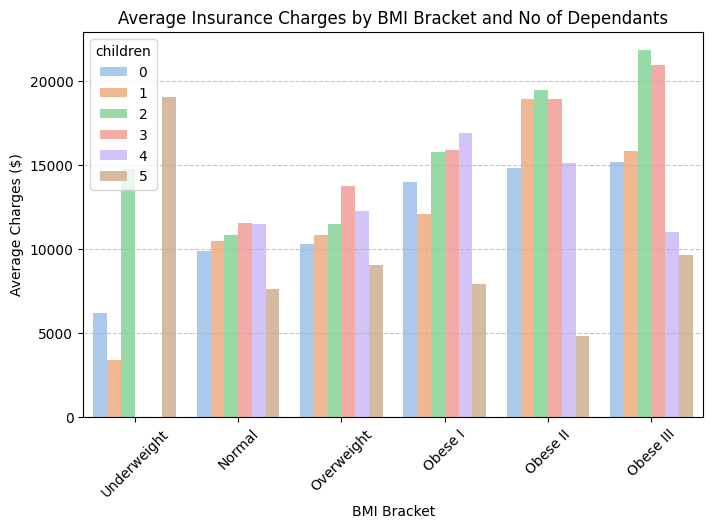

In [ ]:
#Average Charges by BMI Bracket & No of Dependants
#Compute average charges per bmi bracket and no of dependants
bc_avg_charges = data.groupby(['bmi_bracket','children'], observed=True)['charges'].mean().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=bc_avg_charges, 
    x='bmi_bracket', 
    hue='children',
    y='charges', 
    palette='pastel',
    order=data['bmi_bracket'].cat.categories
)

plt.title('Average Insurance Charges by BMI Bracket and No of Dependants')
plt.xlabel('BMI Bracket')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

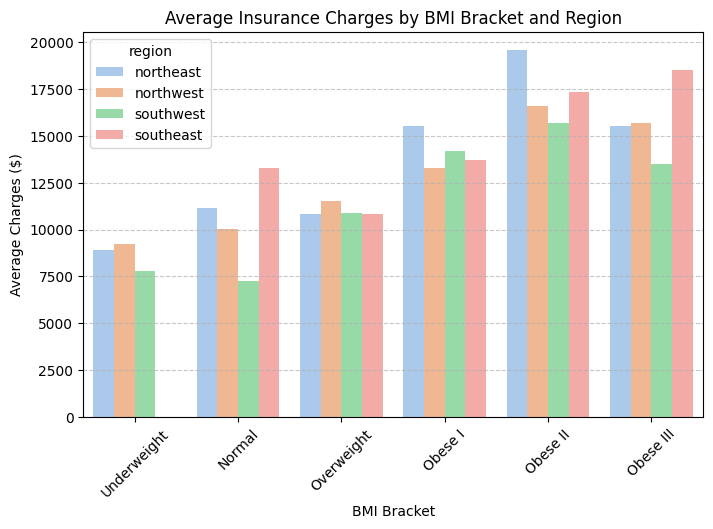

In [45]:
#Average Charges by BMI Bracket & Region
#Compute average charges per bmi bracket and region
br_avg_charges = data.groupby(['bmi_bracket','region'], observed=True)['charges'].mean().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=br_avg_charges, 
    x='bmi_bracket', 
    hue='region',
    y='charges', 
    palette='pastel',
    order=data['bmi_bracket'].cat.categories
)

plt.title('Average Insurance Charges by BMI Bracket and Region')
plt.xlabel('BMI Bracket')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [47]:
# Create a new dataset with selected columns
# Select relevant columns
model_data = data[['age_bracket', 'bmi_bracket', 'sex', 'children', 'smoker', 'region', 'charges']].copy()
model_data.head()

,age_bracket,bmi_bracket,sex,children,smoker,region,charges
0,19–25,Overweight,female,0,yes,southwest,16884.92400
1,0–18,Obese I,male,1,no,southeast,1725.55230
2,26–30,Obese I,male,3,no,southeast,4449.46200
3,31–35,Normal,male,0,no,northwest,21984.47061
4,31–35,Overweight,male,0,no,northwest,3866.85520


In [48]:
#Label Encoding Categorical Variables

from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Columns to encode
cat_cols = ['age_bracket', 'bmi_bracket', 'sex', 'smoker', 'region']

# Encode each categorical column
for col in cat_cols:
    model_data[col] = le.fit_transform(model_data[col])

model_data.head()

,age_bracket,bmi_bracket,sex,children,smoker,region,charges
0,1,4,0,0,1,3,16884.92400
1,0,1,1,1,0,2,1725.55230
2,2,1,1,3,0,2,4449.46200
3,3,0,1,0,0,1,21984.47061
4,3,4,1,0,0,1,3866.85520


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

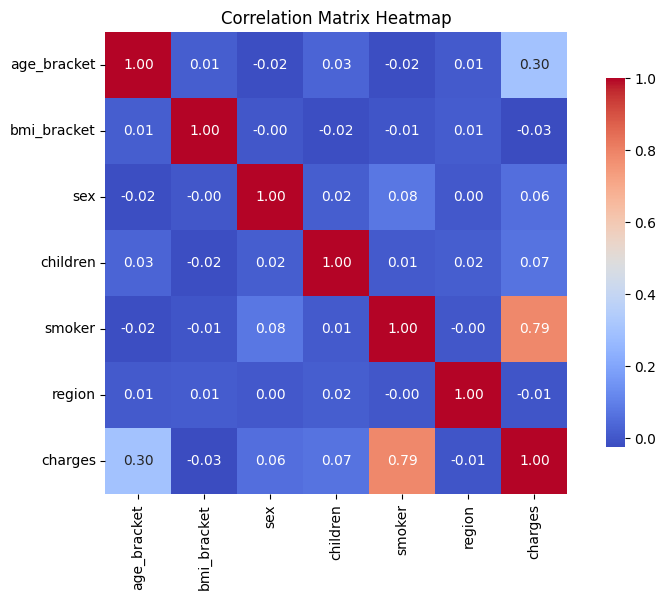

In [49]:
#Heatmap of Correlation Matrix
plt.figure(figsize=(10,6))
corr = model_data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')

smoker has a very strong positive correlation of 0.79 which indicates that smoker status greatly influences insurance charges.
age bracket has a moderate positive correlation of 0.30.
bmi bracket has a weak negative correlation of -0.03 which indicates that bmi alone does not drive insurance charges.

In [50]:
#Save the model_data to a csv file
model_data.to_csv("../data/model_data.csv", index=False)